#### # 학습 시 참고한 URL : https://datascienceschool.net

#### 1. 회귀분석(regression analysis) 정의

D차원 벡터 독립변수  x와 이에 대응하는 스칼라 종속변수  y간의 관계를 정량적으로 찾아내는 작업

휘귀분석의 종류는 크게 결정론적 모형, 확률론적 모형 두가지가 있다.

#### 2. 선형회귀분석의 기초원리

<img src="1.jpg" width="1000" />

#### 3. 결정론적 선형회귀모형의 기초원리

<img src="2.png" width="1000" />

#### 4. bias augmentation

<img src="3.png" width="1000" />

#### 5. OLS(Ordinary Least Squares)

- OLS(Ordinary Least Squares)는 가장 기본적인 결정론적 선형회귀방법으로 잔차제곱합(RSS)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법이다.


- 우리가 사용하는 예측 모형은 다음과 같이 상수항이 결합된 선형 모형이다.

$$\ \hat{y} = Xw $$

- 이때 잔차 벡터(residual vector) e는 아래 수식과 같다.

$$\ e = {y} - \hat{y} = y - Xw $$

- 잔차제곱합(RSS : Residual sum of squares)은 아래 수식과 같다.

$$\ \begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray} $$


- 잔차의 크기 즉, 잔차 제곱합을 가장 작게 하는 가중치 벡터를 구하기 위해 잔차 제곱합의 그레디언트 벡터를 구하면 다음과 같다.

$$ \ \dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w $$


- 잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터이어야 하므로 다음 식이 성립한다.

$$\ \dfrac{d \text{RSS}}{d w}  = 0  →  X^TX w = X^T y $$

- 만약 $\ X^TX $ 행렬의 역행렬이 존재한다면 다음처럼 최적가중치 벡터 w를 구할 수 있다.

$$\ w = (X^TX)^{-1} X^T y $$

- $\ X^TX $ 행렬의 역행렬이 존재하고 위에서 구한 값이 $\ f(w) $ 의 최고값이 아닌 최저값이 되려면 조건


$\ X^TX $ 가 양의 정부호(positive definite) 행렬을 만족해야 함


만약 X가 풀랭크가 아니면 OLS는 성립하지 않는다. 즉 X의 각 행렬이 서로 독립이 아니면 $\ X^TX $가 양의 정부호가 아니고 역행렬이 존재하지 않으기 때문이다.

#### 6. normal equation(직교방정식)

<img src="4.jpg" width="1000" />

#### 7. NumPy를 이용한 결정론적 선형회귀모형 구현

NumPy의 선형대수 기능을 사용하여 OLS 방법으로 선형 회귀분석모형을 구현한다. 

우선 make_regression 명령을 사용하여 다음과 같이 1차원 특징 데이터 x와 이 값에 의존하는 y를 만든다.

In [23]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X0, y, w = make_regression(n_samples=200, n_features=1, bias=300, noise=15, coef=True, random_state = 1)

X = sm.add_constant(X0)

y = y.reshape(len(y), 1)

우리가 준 bias 값은 300 이고 make_regression 명령이 생성한 모수 값은 다음과 같다.

In [24]:
w

array(86.44794301)

따라서 x와 y는 다음과 같은 관계를 가진다.

$$\ y = 300 + 86.4479 x + \epsilon $$

위에서 구한 수식을 이용하여 선형회귀 계수를 추정하면 다음과 같다.

OLS 해를 numpy로 다이렉트로 구할때

$$\ w = (X^TX)^{-1} X^T y $$ 의 공식을 아래와 같이 직접 넣어준다.

In [25]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[299.68726303],
       [ 87.21859652]])

즉, 다음 방정식을 이용하여 y를 예측한다.

$$\ \hat{y} = 299.6872 + 87.2189 x $$

이 결과에서 알 수 있는 것은 선형 회귀를 통해 구한 결과는 실제(자연 법칙)와 비슷하지만 정확하지는 않다는 점이다.

In [26]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

array([[299.68726303],
       [ 87.21859652]])

다음 코드는 여러가지 새로운  x값에 대해  y헷을 구해본 결과를 원래 데이터와 비교한 것이다.

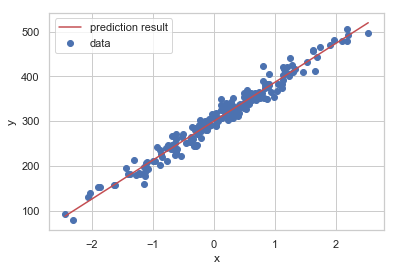

In [27]:
x_new = np.linspace(np.min(X0), np.max(X0), 200)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="prediction result")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()